# The Titanic - A Cautionary Tale (For Data Scientists) #
## By Justin Matters                      justin.matters@gmail.com ##

### In April 1912 the Titanic sank. Fewer than one third of the passengers and crew survived. ###

### The Titanic data is often used as a sample data set in plotting, data analysis and machine learning contexts. ###

In [57]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns # NB needs Seaborn 0.9.0

# Enable inline printing
%matplotlib inline

# suppress warnings
import warnings
warnings.simplefilter('ignore')

# load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# make the survived column more human readable 
titanic_df["survived"] = titanic_df["survived"].map({1: "Yes", 0:"No"})
# set up a check variable for later
categories = titanic_df["deck"].cat

# look at head of dataframe
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,No,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,Yes,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,Yes,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,Yes,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,No,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### On the Titanic the First Class passengers were largely accomodated on the upper decks A-D, second class passengers on decks D-F and third class E-G. ###

### Lets use the data to examine survival by deck. ###

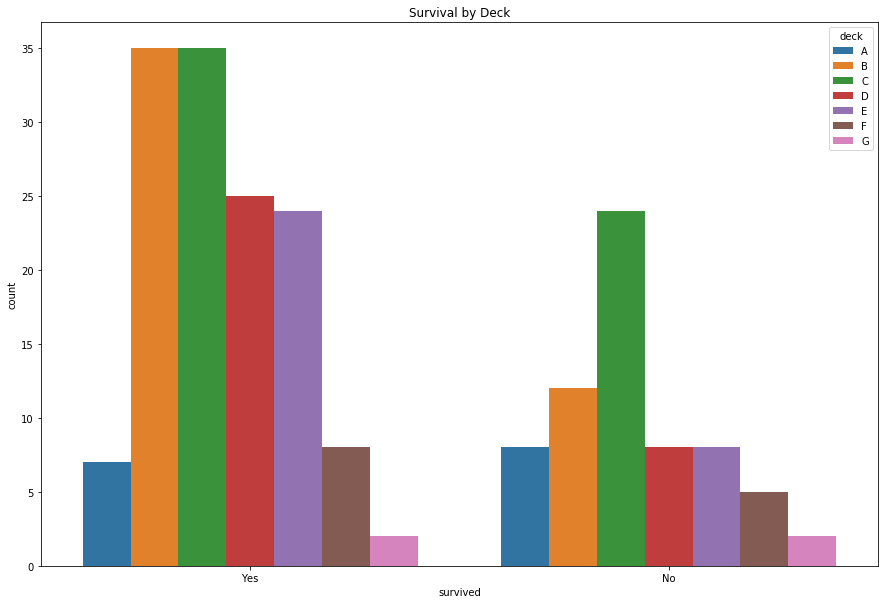

In [58]:
# Plot survival versus deck
_figure, axes = plt.subplots(figsize=(15,10))
sns.countplot("survived", data = titanic_df, hue="deck", axes = axes,
              hue_order = ["A", "B", "C", "D", "E", "F", "G"], order = ["Yes", "No"]).set_title('Survival by Deck');

### At a glance the broad shape of the distributions of passengers who survived and perished look similar. ###

### However can anyone see anything suspicious? ###

### Lets use the data to analyse the survival rates by deck ###

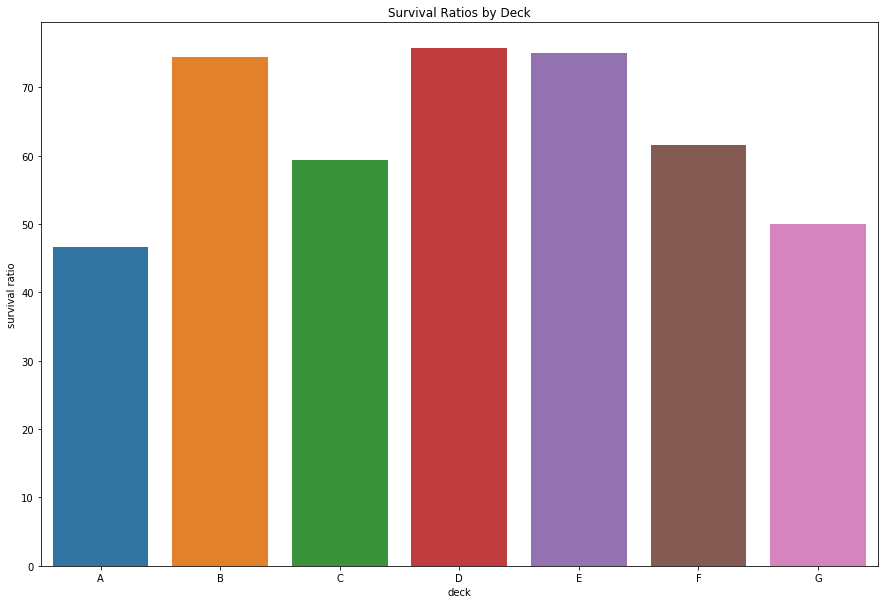

In [59]:
# convert the data so that we can visualise survival ratios
titanic_small = titanic_df[["deck", "survived"]]
titanic_small["count"] = 1
titanic_pivot = titanic_small.pivot_table(index = "survived", columns="deck", aggfunc=np.sum).T
titanic_pivot["survival ratio"] = (titanic_pivot["Yes"] * 100) / (titanic_pivot["No"] + titanic_pivot["Yes"])

# reorganise the indexes to tidy the dataframe
titanic_pivot = titanic_pivot.reset_index()
titanic_pivot = titanic_pivot.reset_index(drop=True)
titanic_pivot.drop(columns = ["level_0"], inplace = True)

# visualise the data
_figure, axes = plt.subplots(figsize=(15,10))
sns.barplot(x = "deck", y = "survival ratio", data = titanic_pivot, axes = axes).set_title('Survival Ratios by Deck');

### Perhaps surprisingly according to the data survival rates do not seem to differ that drastically by deck ###

### However all is not as it seems. There are a variety of ways of dealing with missing data. ###

### This is an example where the approach chosen matters. ###

### Seaborn plots and Pandas pivot_table implicitly drop missing values. In this case that makes a difference. ###

### Lets plot the data again, this time though lets be sure to allocate a code of "N" to missing deck allocations ###

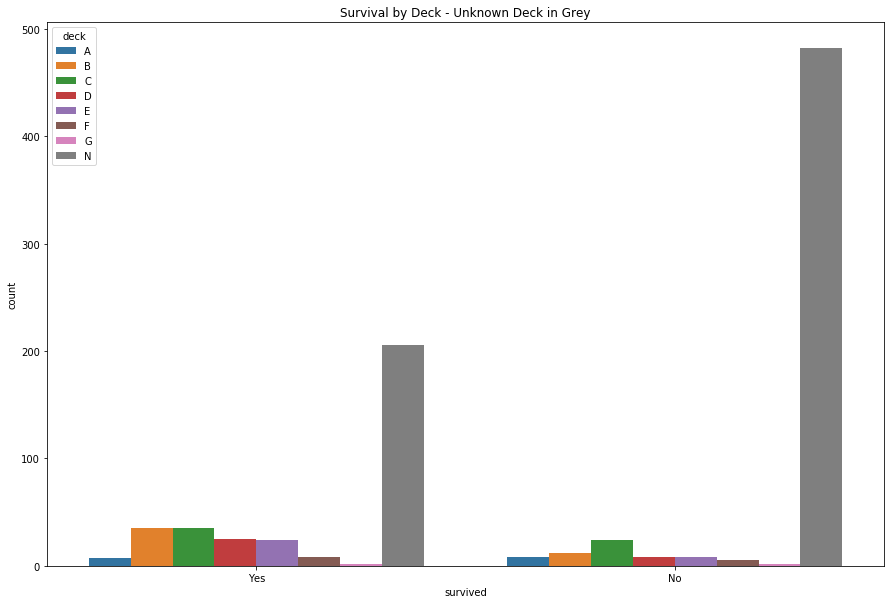

In [60]:
# Run fillna on the NaNs and plot again
if titanic_df["deck"].isna().sum() > 0:
    titanic_df["deck"] = titanic_df["deck"].cat.add_categories(["N"])
    titanic_df["deck"] = titanic_df["deck"].fillna("N")

# and plot
_figure, axes = plt.subplots(figsize=(15,10))
sns.countplot("survived", data = titanic_df, hue="deck", axes = axes, hue_order = ["A", "B", "C", "D", "E", "F", "G", "N"],
              order = ["Yes", "No"]).set_title('Survival by Deck - Unknown Deck in Grey');

### Here we can see our error, there are far more victims for whom we do not have a known deck allocation ###

### Lets visualise this another way, grouping survivors according to whether we know the deck or not ###

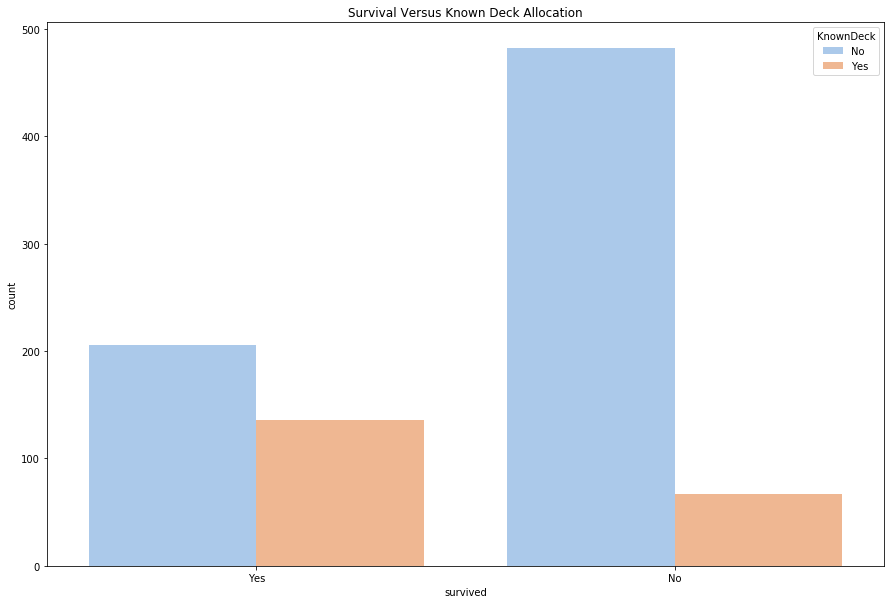

In [61]:
# lets add a column indicating whether the cabin is known
titanic_df["KnownDeck"] = titanic_df["deck"].apply(lambda x: "No" if x == "N" else "Yes")

# Now display the distribution of survivors
_figure, axes = plt.subplots(figsize=(15,10))
sns.countplot("survived", data=titanic_df, hue="KnownDeck", order = ["Yes", "No"], palette="pastel", 
              axes = axes).set_title('Survival Versus Known Deck Allocation');

### We could also plot to investigate the relationships between class, sex, known deck allocation and survival. ###

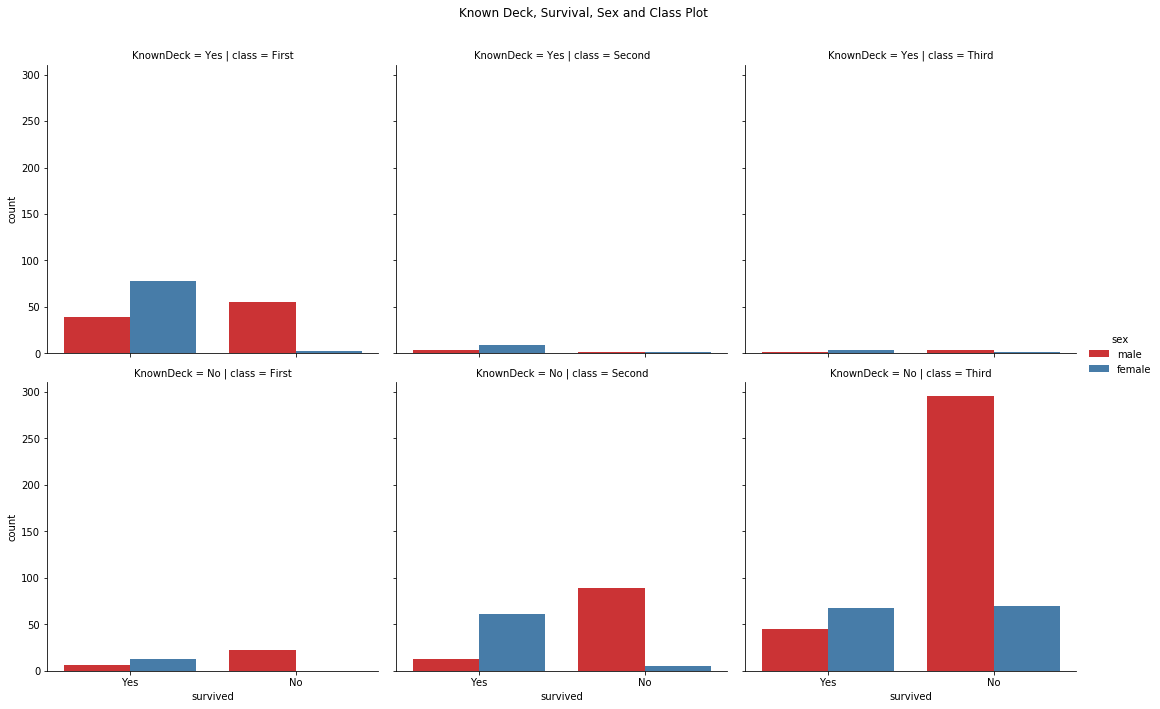

In [62]:
# now lets plot to see if the cabins we have are a representative sample across sexes and classes
sns.catplot(x = "survived", order = ["Yes", "No"], row = "KnownDeck", row_order = ["Yes", "No"], col = "class", palette = "Set1",
            hue = "sex", data = titanic_df, kind = "count").fig.suptitle('Known Deck, Survival, Sex and Class Plot')
plt.subplots_adjust(top=0.9);

### We can now see that our deck sample is not drawn from the same distribution as the main data. 

### We know the deck of far more first class passengers, who generally survived. ###

### By contrast most of the third class passenger's deck allocations are unknown, and they mostly perished. ###

### Finally lets see how well the presence or absence of a deck allocation is correllated with survival. ###

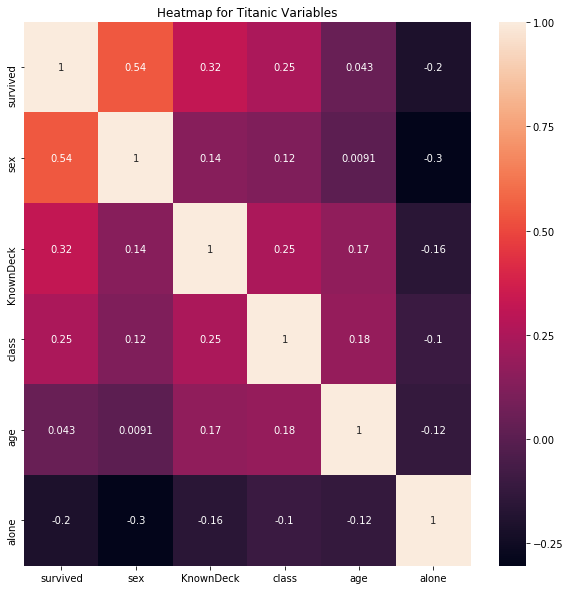

In [63]:
# create a subset of the dataframe
titanic_heatmap =titanic_df[["survived","sex","KnownDeck",  "class", "age", "alone"]].copy()
# factorize it
titanic_heatmap = titanic_heatmap.apply(lambda x: pd.factorize(x)[0])
# Compute the correlation matrix
corr = titanic_heatmap.corr()
# and show us the results
_figure, axes = plt.subplots(figsize=(10,10))
sns.heatmap(data = corr, annot=True).set_title('Heatmap for Titanic Variables');

### Here we can see that the absence of a known deck allocation is better correlated with survival than almost any other variable apart from the sex of the passenger. ###

### Beware of data icebergs, sometimes the data you can see is only part of the story. ###

### The absence of data can itself be extremely meaningful. ###

### Some additional discussion can be seen at at https://justinmatters.co.uk/wp/ ###

### Presentation can be found at https://github.com/JustinMatters/Titanic-Missing-Data-Presentation ###

### Email justin.matters@gmail.com ###